# Regresja wektorów wspierających

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [12]:
dane = pd.read_csv('04_mieszkania.csv')
X = dane.iloc[:, :1].values # kolumna pierwasza 
y = dane.iloc[:, -1].values # ostatnia kolumna
y = y.reshape(len(y), 1)

In [13]:
# Sprowadzenie danych do skalarów, żeby oscylowały w podobnych wielkościach X i y
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [15]:
model = SVR(kernel='rbf')
model.fit(X, y.ravel()) #ravel spłaszcza tablice y do jednego wymiary, wymagania dla fit

SVR()

In [5]:
# prognozy dla jednej danej wejściowej
dana_in = sc_X.transform([[48]]) # transformacja do skalara
dana_pred = model.predict(dana_in) # prognoza wg modelu
dana = dana_pred.reshape(-1,1) # konwersja do tablicy dwuwymiarowej
sc_y.inverse_transform(dana) # powrót do formatu danych wejściowych

# w jdnej linii
# sc_y.inverse_transform(model.predict(sc_X.transform([[48]])).reshape(-1,1))

[[-0.21063637]]
[-0.31620603]
[[-0.31620603]]


array([[758385.7898664]])

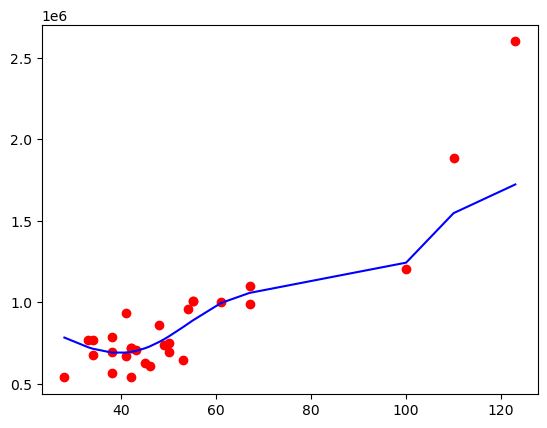

In [6]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color= 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(model.predict(X).reshape(-1,1)), color= 'blue')
plt.show()

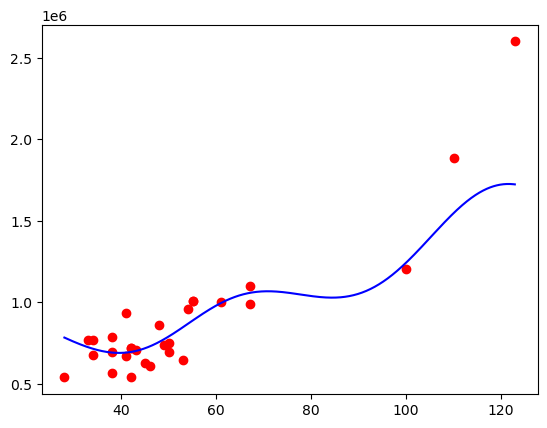

In [7]:
# przeliczenie z modelu do gęstej ilości punktów
X_siatka = np.arange(np.min(sc_X.inverse_transform(X)), np.max(sc_X.inverse_transform(X)), 0.1) # wygenerowanie X wejściowych o gęstości co 0.1
X_siatka = X_siatka.reshape(len(X_siatka), 1) # konwersja do tablicy dwu wymiarowej
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color= 'red')
plt.plot(X_siatka, sc_y.inverse_transform(model.predict(sc_X.transform(X_siatka)).reshape(-1,1)), color= 'blue')
plt.show()

# Dla wielu cech

In [8]:
dane = pd.read_csv('04_mieszkania.csv')
X = dane.iloc[:, :-1].values # kolumnu oprócz ostatniej 
y = dane.iloc[:, -1].values # ostatnia kolumna
# X, y

In [9]:
# zmiana formatu tablicy y, bedzie taka sama jak X, przygotowanie pod fit_transform
y = y.reshape(len(y), 1)
# y

In [10]:
# przygotowanie danych pod SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
# X, y

In [11]:
# uczenie modelu
model = SVR(kernel='rbf')
model.fit(X, y.ravel()) #ravel zpłaszcza tablice dla fit

SVR()

In [12]:
# prognozy dla jednej danej wejściowej
# nowe_dane = np.array([[42, 3, 2008]])
# nowe_dane_sc = sc_X.transform(nowe_dane)
# pred_sc = model.predict(nowe_dane_sc)
# sc_y.inverse_transform(pred_sc.reshape(-1,1))

In [13]:
# prognozy dla jednej danej wejściowej
data = np.array([[42, 3, 2008]])# model działa na danych transform
print(data)
data = sc_X.transform(data)
print(data)
data = model.predict(data) # prognoza wg modelu
print(data)
data = data.reshape(-1,1) # zmiana wymiaru tablicy, z jedno na dwu wymiarową pod inverse_transform
print(data)
sc_y.inverse_transform(data) # powrót do formatu danych wejściowych

[[  42    3 2008]]
[[-0.48212324  0.57777841 -1.125     ]]
[-0.46694893]
[[-0.46694893]]


array([[695803.54216946]])